<a href="https://colab.research.google.com/github/renatadecassiapires/YOLO_OpenCV_Python/blob/main/YOLOv8_OpenCV_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalar YOLO através do pacote pip install da Ultralytics

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 4.0 MB/s eta 0:00:00


# 2. Importar todas as funções e bibliotecas necessárias ao projeto

In [3]:
import ultralytics
from ultralytics import YOLO
import cv2 #openCV
import matplotlib.pyplot as plt # para visualização gráfica
import os # pata termos acesso aos recursos operacionais do sistema
from PIL import Image
from google.colab.patches import cv2_imshow # para visualizar as imagens

# 3. Selecionar GPU

> Editar >> Configurações de notebook >> T4GPU >> Salvar

> Rodar nvidia para obter detalhes da GPU instalada






In [4]:
!nvidia-smi

Thu Dec 28 14:12:46 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 4. Treinamento do modelo via Python

In [5]:
# definir função mostrar

def mostrar(imagem):
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

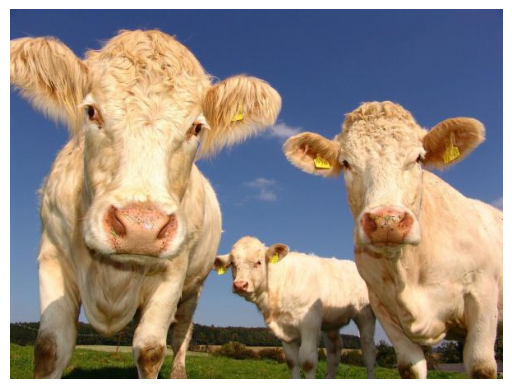

In [7]:
# carregar o modelo que iremos trabalhar - neste caso yolov8n.pt)
# carregar a imagem que será trabalhada e visualizar a imagem

model = YOLO('yolov8n.pt') # 'yolov8n.pt' contém pesos pré-treinados
caminho_img = '/content/vaquinhas.jpg' # carregar uma imagem
img = cv2.imread(caminho_img) # fazer a leitura da imagem
mostrar(img) # mostar a imagem q será trabalhada

# 5. Usar método model.predict() para treinar o modelo

1.   Aceita basicamente os mesmos parâmetros do método via CLI;
2.   Parâmetros do código
3.   source -- A função aceita a imagem nos seguintes formatos:
4.   imagem em ndarray (usando o cv2.imread) ou PIL;
5.   diretório;
6.   caminho;
7.   URL;
8.   video;
9.   webcam (valor 0, que corresponde ao indice do dispositivo de câmera)
10.  save -- se desejar salvar a imagem no diretório predict >> deixar no código o save=True;
11.  conf -- limiar de confiança;
12.  show -- informar o parâmetro show=True para mostrar os valores das predições;
13.  save_txt -- se deseja salvar em um txt os resultados;
14.  mais parâmetros https://docs.ultralytics.com/cfg/





In [10]:
# criar a variável resultados e chamar model predict
resultados = model.predict(source=img)
for r in resultados:
  print(r.boxes.data)
for r in resultados:
  print(r.boxes.conf) # observar as confianças de acordo com os bounding boxes acima


0: 480x640 3 cows, 8.5ms
Speed: 5.1ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
tensor([[  7.7832,  24.3712, 331.7823, 449.4752,   0.9464,  19.0000],
        [331.5262, 110.6685, 600.0000, 450.0000,   0.9458,  19.0000],
        [248.4586, 276.2946, 448.6875, 449.8840,   0.9421,  19.0000]], device='cuda:0')
tensor([0.9464, 0.9458, 0.9421], device='cuda:0')


# 6. Desenhar os bounding boxes nas imagens detectadas


1.   Qdo se faz a detecção através do python, precisamos determinar o desenho das bounding boxes nas imagens detectadas
2.   funçoes_desenho.py foi previamente criada para esta etapa



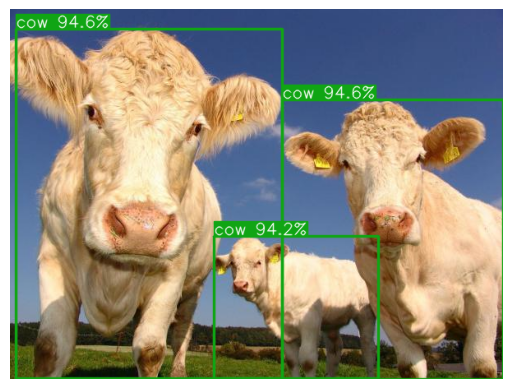

In [11]:
# importar função 'funções_desenho.py'
import funcoes_desenho
resultado = funcoes_desenho.desenha_caixas(img, resultados[0].boxes.data)
mostrar(resultado)

# 7. Segmentação de imagem via YOLO usando Python

1.   Add -seg após a escolha do modelo




100%|██████████| 52.4M/52.4M [00:00<00:00, 223MB/s]



0: 480x640 3 cows, 127.8ms
Speed: 2.4ms preprocess, 127.8ms inference, 14.2ms postprocess per image at shape (1, 3, 480, 640)


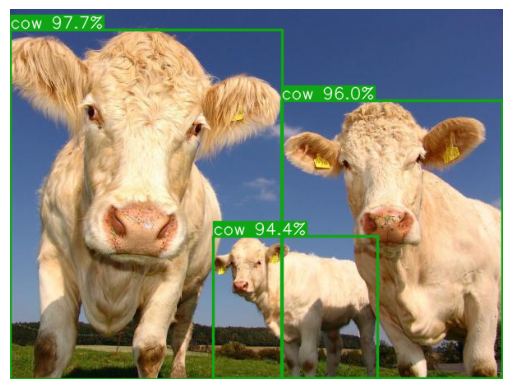

In [12]:
model_seg = YOLO('yolov8m-seg.pt')
caminho_img = '/content/vaquinhas.jpg'
img = cv2.imread(caminho_img)
resultados = model_seg.predict(source=img, conf=0.6)
resultado_img = funcoes_desenho.desenha_caixas(img, resultados[0].boxes.data)
mostrar(resultado_img)